In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [2]:
sprice= 'Average_sale_price_us_houses.csv'
dfsprice = pd.read_csv(sprice)
describesprice = dfsprice.describe()
print(dfsprice.head())
print(describesprice)

       Year  Average Sale Price(year)  Yearly Change
0  1/1/1963                   19375.0            NaN
1  1/1/1964                   20300.0            4.8
2  1/1/1965                   21450.0            5.7
3  1/1/1966                   22925.0            6.9
4  1/1/1967                   24125.0            5.2
       Average Sale Price(year)  Yearly Change
count                 61.000000      60.000000
mean              182521.038251       5.735000
std               136552.455321       5.653342
min                19375.000000      -6.800000
25%                62700.000000       2.200000
50%               149075.000000       5.650000
75%               288225.000000       8.900000
max               535500.000000      17.300000


# Basic Graph

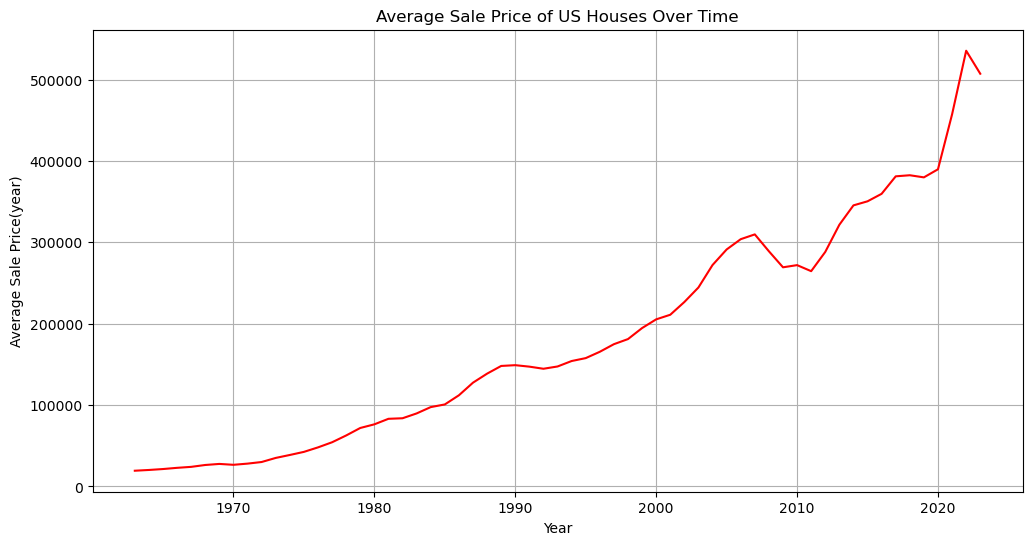

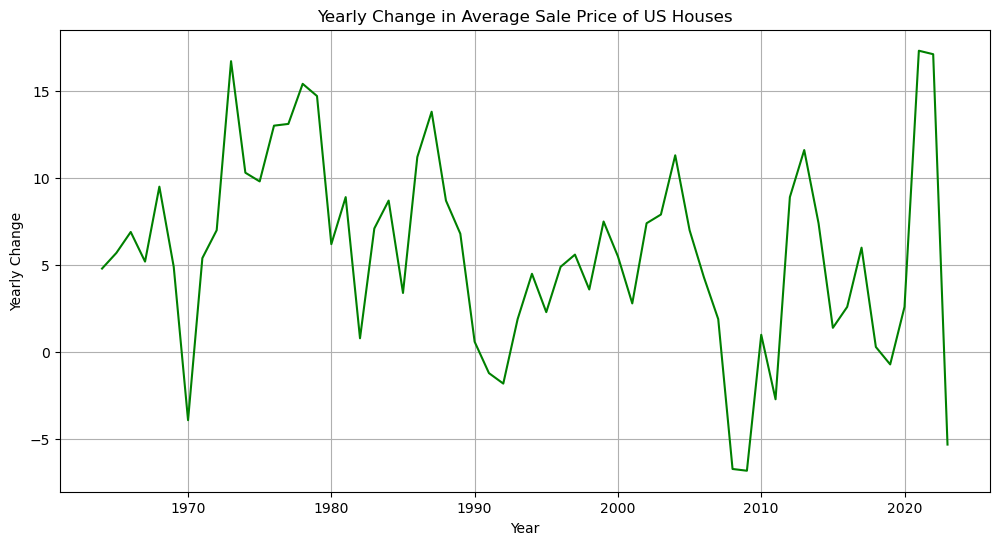

In [3]:
dfsprice['Year'] = pd.to_datetime(dfsprice['Year'])
dfsprice.set_index('Year', inplace=True)

# Create a time series plot for 'Average Sale Price(year)'
plt.figure(figsize=(12, 6))
plt.plot(dfsprice.index, dfsprice['Average Sale Price(year)'], color='red')
plt.xlabel('Year')
plt.ylabel('Average Sale Price(year)')
plt.title('Average Sale Price of US Houses Over Time')
plt.grid()
plt.show()

# Create a separate time series plot for 'Yearly Change'
plt.figure(figsize=(12, 6))
plt.plot(dfsprice.index, dfsprice['Yearly Change'], color='green')
plt.xlabel('Year')
plt.ylabel('Yearly Change')
plt.title('Yearly Change in Average Sale Price of US Houses')
plt.grid()
plt.show()
plt.show()

In [4]:
# 5 Year moving average

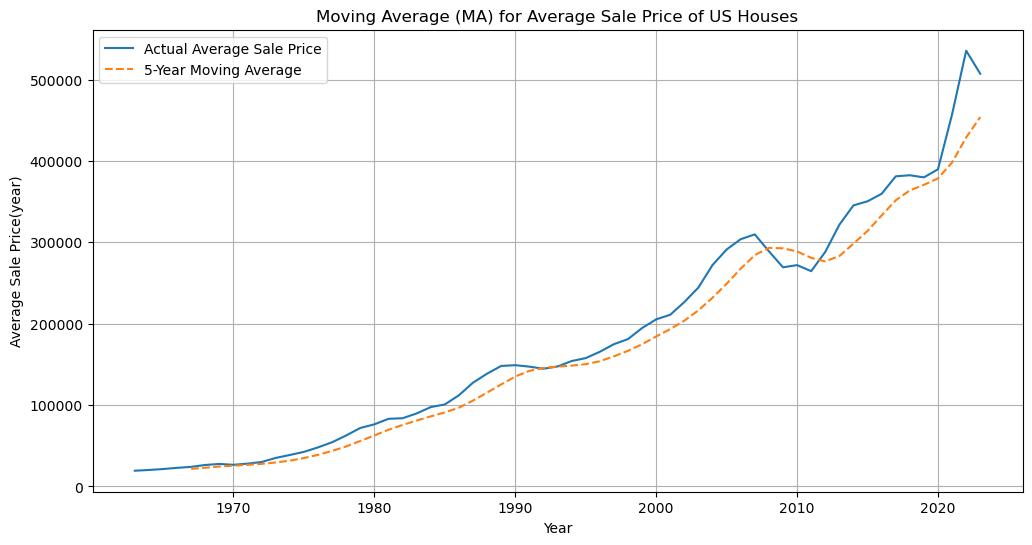

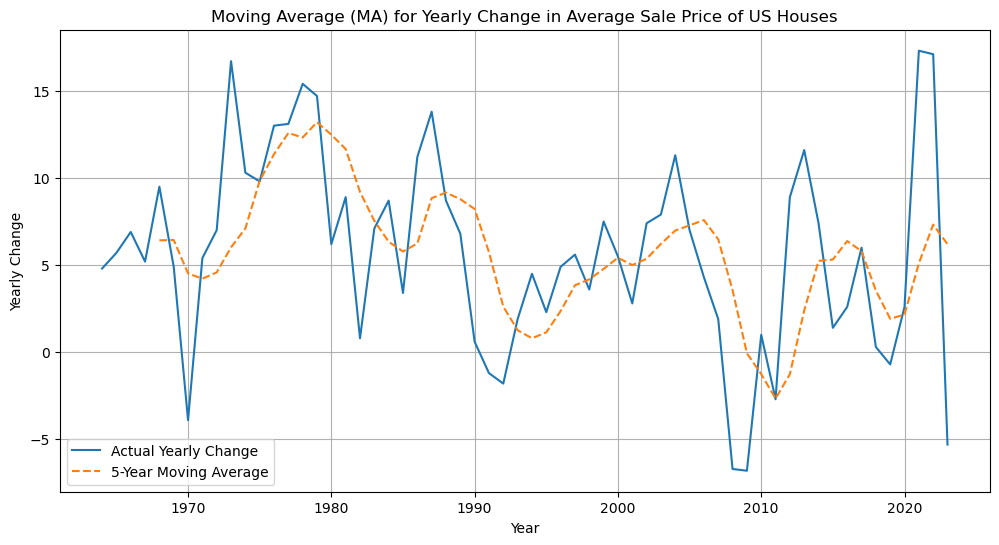

In [5]:
dfsprice.index = pd.to_datetime(dfsprice.index)

# Create a DataFrame with only the necessary columns
data = dfsprice[['Average Sale Price(year)', 'Yearly Change']]

# Calculate the 5-year moving average
data['Average Sale Price(year)_MA'] = data['Average Sale Price(year)'].rolling(window=5).mean()
data['Yearly Change_MA'] = data['Yearly Change'].rolling(window=5).mean()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Average Sale Price(year)'], label='Actual Average Sale Price')
plt.plot(data.index, data['Average Sale Price(year)_MA'], label='5-Year Moving Average', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Average Sale Price(year)')
plt.title('Moving Average (MA) for Average Sale Price of US Houses')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Yearly Change'], label='Actual Yearly Change')
plt.plot(data.index, data['Yearly Change_MA'], label='5-Year Moving Average', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Yearly Change')
plt.title('Moving Average (MA) for Yearly Change in Average Sale Price of US Houses')
plt.legend()
plt.grid()
plt.show()

# ARIMA Model forecasting

C:\Users\mpabb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\mpabb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\mpabb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\mpabb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\mpabb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

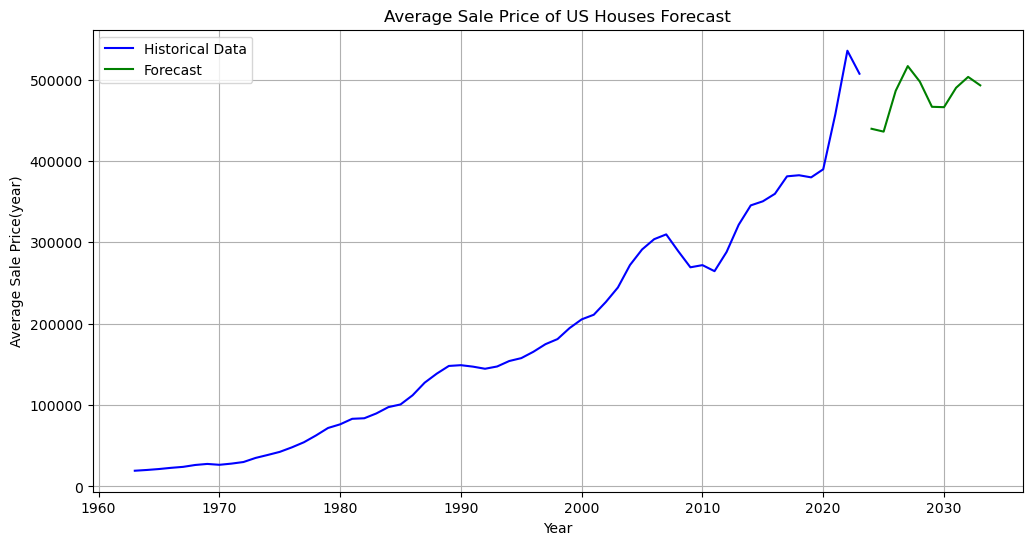

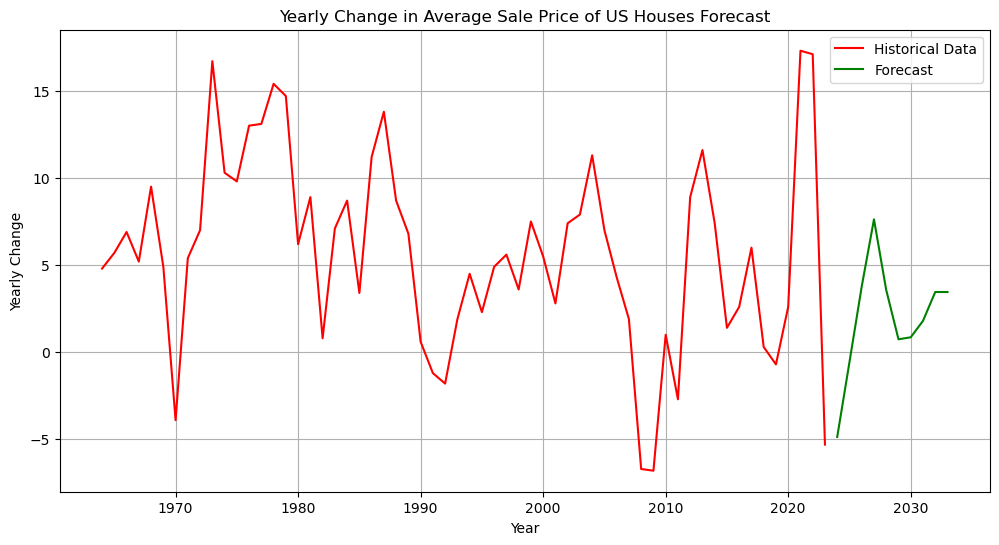

Forecasted Average Sale Price(year):
2024-01-01    439583.178568
2025-01-01    436080.188747
2026-01-01    486249.700115
2027-01-01    516621.983671
2028-01-01    497500.677187
2029-01-01    466584.443227
2030-01-01    466125.290978
2031-01-01    489972.281672
2032-01-01    503314.476713
2033-01-01    492960.947437
Freq: AS-JAN, Name: predicted_mean, dtype: float64

Forecasted Yearly Change:
2024-01-01   -4.863271
2025-01-01   -0.561069
2026-01-01    3.772979
2027-01-01    7.625692
2028-01-01    3.571227
2029-01-01    0.740784
2030-01-01    0.856802
2031-01-01    1.798797
2032-01-01    3.454712
2033-01-01    3.453134
Freq: AS-JAN, Name: predicted_mean, dtype: float64


In [6]:
dfsprice.index = pd.to_datetime(dfsprice.index)

# Fit an ARIMA model to the 'Average Sale Price(year)' data
model_price = ARIMA(dfsprice['Average Sale Price(year)'], order=(5, 1, 0))  # You may need to adjust the order
model_price_fit = model_price.fit()

# Forecast the next 10 years (assuming annual data)
forecasted_price = model_price_fit.forecast(steps=10)

# Fit an ARIMA model to the 'Yearly Change' data
model_yearly_change = ARIMA(dfsprice['Yearly Change'], order=(5, 1, 0))  # You may need to adjust the order
model_yearly_change_fit = model_yearly_change.fit()

# Forecast the next 10 years (assuming annual data)
forecasted_yearly_change = model_yearly_change_fit.forecast(steps=10)

# Create a time series plot for the forecasted 'Average Sale Price(year)'
plt.figure(figsize=(12, 6))
plt.plot(dfsprice.index, dfsprice['Average Sale Price(year)'], color='blue', label='Historical Data')
forecasted_price_index = pd.date_range(start=dfsprice.index[-1] + pd.DateOffset(years=1), periods=10, freq='AS-JAN')
plt.plot(forecasted_price_index, forecasted_price, color='green', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Average Sale Price(year)')
plt.title('Average Sale Price of US Houses Forecast')
plt.legend()
plt.grid()
plt.show()

# Create a time series plot for the forecasted 'Yearly Change'
plt.figure(figsize=(12, 6))
plt.plot(dfsprice.index, dfsprice['Yearly Change'], color='red', label='Historical Data')
forecasted_yearly_change_index = pd.date_range(start=dfsprice.index[-1] + pd.DateOffset(years=1), periods=10, freq='AS-JAN')
plt.plot(forecasted_yearly_change_index, forecasted_yearly_change, color='green', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Yearly Change')
plt.title('Yearly Change in Average Sale Price of US Houses Forecast')
plt.legend()
plt.grid()
plt.show()

# Forecasted values for 'Average Sale Price(year)'
print("Forecasted Average Sale Price(year):")
print(forecasted_price)

# Forecasted values for 'Yearly Change'
print("\nForecasted Yearly Change:")
print(forecasted_yearly_change)

# Holts Winters Exponential smoothing

C:\Users\mpabb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\mpabb\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\mpabb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\mpabb\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


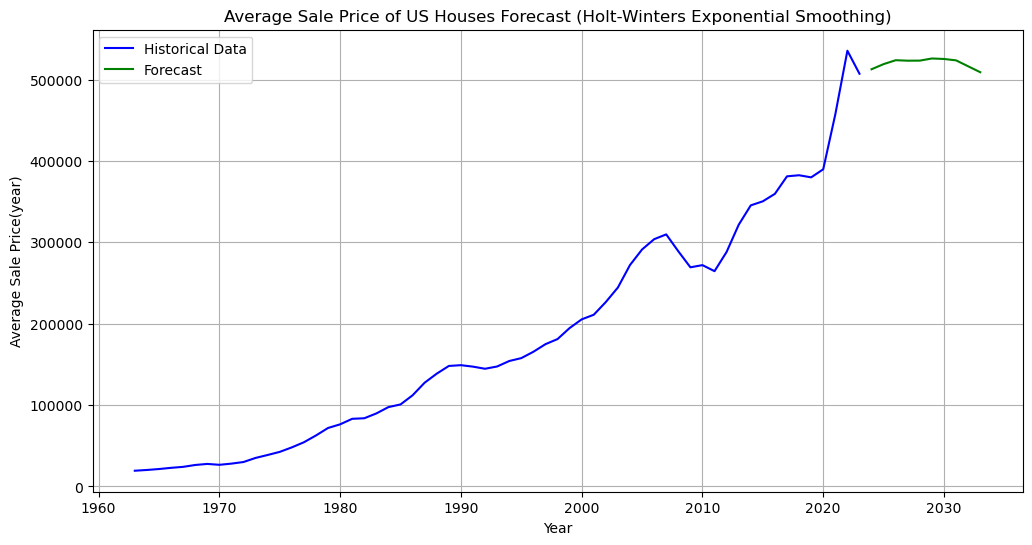

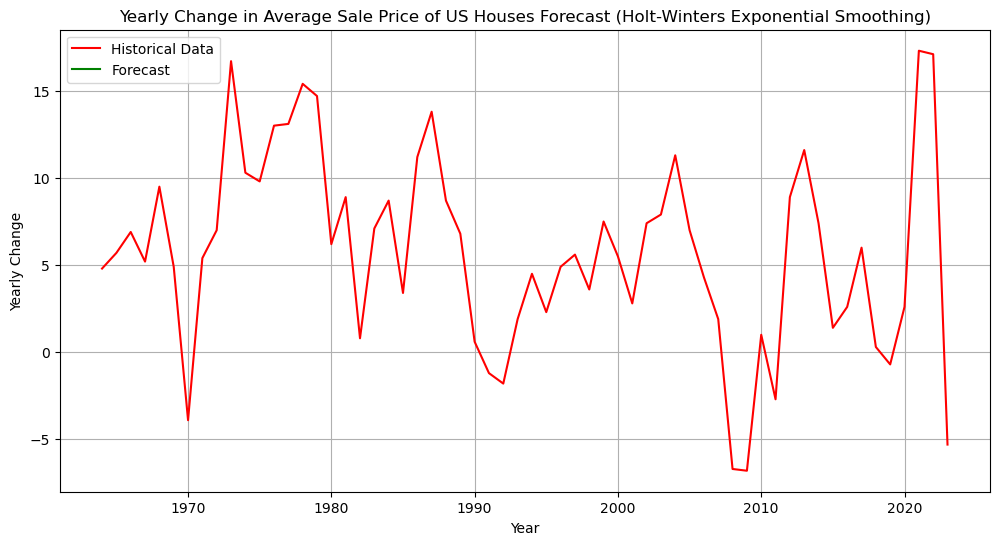

Forecasted Average Sale Price(year):
2024-01-01    512710.663750
2025-01-01    519058.488568
2026-01-01    523834.735398
2027-01-01    523252.204919
2028-01-01    523341.885835
2029-01-01    525969.283943
2030-01-01    525353.710988
2031-01-01    523648.180208
2032-01-01    516363.499057
2033-01-01    509091.778445
Freq: AS-JAN, dtype: float64

Forecasted Yearly Change:
2024-01-01   NaN
2025-01-01   NaN
2026-01-01   NaN
2027-01-01   NaN
2028-01-01   NaN
2029-01-01   NaN
2030-01-01   NaN
2031-01-01   NaN
2032-01-01   NaN
2033-01-01   NaN
Freq: AS-JAN, dtype: float64


In [7]:
dfsprice.index = pd.to_datetime(dfsprice.index)

# Fit Holt-Winters Exponential Smoothing model to 'Average Sale Price(year)'
model_price = ExponentialSmoothing(dfsprice['Average Sale Price(year)'], seasonal='add', seasonal_periods=12)
model_price_fit = model_price.fit()

# Forecast the next 10 years (assuming annual data)
forecasted_price = model_price_fit.forecast(steps=10)

# Fit Holt-Winters Exponential Smoothing model to 'Yearly Change'
model_yearly_change = ExponentialSmoothing(dfsprice['Yearly Change'], seasonal='add', seasonal_periods=12)
model_yearly_change_fit = model_yearly_change.fit()

# Forecast the next 10 years (assuming annual data)
forecasted_yearly_change = model_yearly_change_fit.forecast(steps=10)

# Create a time series plot for the forecasted 'Average Sale Price(year)'
plt.figure(figsize=(12, 6))
plt.plot(dfsprice.index, dfsprice['Average Sale Price(year)'], color='blue', label='Historical Data')
forecasted_price_index = pd.date_range(start=dfsprice.index[-1] + pd.DateOffset(years=1), periods=10, freq='AS-JAN')
plt.plot(forecasted_price_index, forecasted_price, color='green', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Average Sale Price(year)')
plt.title('Average Sale Price of US Houses Forecast (Holt-Winters Exponential Smoothing)')
plt.legend()
plt.grid()
plt.show()

# Create a time series plot for the forecasted 'Yearly Change'
plt.figure(figsize=(12, 6))
plt.plot(dfsprice.index, dfsprice['Yearly Change'], color='red', label='Historical Data')
forecasted_yearly_change_index = pd.date_range(start=dfsprice.index[-1] + pd.DateOffset(years=1), periods=10, freq='AS-JAN')
plt.plot(forecasted_yearly_change_index, forecasted_yearly_change, color='green', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Yearly Change')
plt.title('Yearly Change in Average Sale Price of US Houses Forecast (Holt-Winters Exponential Smoothing)')
plt.legend()
plt.grid()
plt.show()

# Print the forecasted values for 'Average Sale Price(year)'
print("Forecasted Average Sale Price(year):")
print(forecasted_price)

# Print the forecasted values for 'Yearly Change'
print("\nForecasted Yearly Change:")
print(forecasted_yearly_change)